In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [22]:
data = pd.read_csv("data.csv",index_col=0)
data.head()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


In [23]:
#one hot encoding
data=pd.get_dummies(data,columns=['location','country'])
data.shape

(863, 185)

In [24]:
data.head()

,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,...,country_24,country_25,country_26,country_27,country_28,country_29,country_30,country_31,country_32,country_33
0,1,66.0,1,0,14,31,19,12,3,1,...,0,0,0,0,0,0,0,0,0,0
1,0,56.0,0,1,14,31,19,12,3,1,...,0,0,0,0,0,0,0,0,0,0
2,1,46.0,0,1,14,31,19,12,3,1,...,0,0,0,0,0,0,0,0,0,0
3,0,60.0,1,0,14,31,19,12,3,1,...,0,0,0,0,0,0,0,0,0,0
4,1,58.0,0,0,14,31,19,12,3,1,...,0,0,0,0,0,0,0,0,0,0


In [25]:
data2 = data.columns.tolist()
data2 = data2[12:186] + data2[0:12]
data=data[data2]
data.head()

,location_0,location_1,location_2,location_3,location_4,location_5,location_6,location_7,location_8,location_9,...,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,0,0,0,0,0,0,0,0,0,0,...,1,0,14,31,19,12,3,1,8,1
1,0,0,0,0,0,0,0,0,0,0,...,0,1,14,31,19,12,3,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,14,31,19,12,3,1,13,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,14,31,19,12,3,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,14,31,19,12,3,1,0,0


In [26]:
x=data.iloc[:,0:184].values
y=data.iloc[:,184].values


In [27]:
#normalization
st_x= StandardScaler()
x= st_x.fit_transform(x)

In [28]:
#feature selection
x = SelectKBest(score_func=f_classif, k=10).fit_transform(x,y)
#x = test.fit(x, y)
print(x.shape)

(863, 10)


In [29]:
from sklearn.model_selection import train_test_split
#spiliting data
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=3) 

In [30]:
from sklearn.linear_model import LogisticRegression
#logistic regression
model = LogisticRegression()
model.fit(x, y)

LogisticRegression()

In [31]:
y_predict=model.predict(x_test)

In [32]:
#confusion matrix
from sklearn.metrics import confusion_matrix
#tn fp 
#fn tp
print(confusion_matrix(y_test, y_predict))

[[149   6]
 [  5  13]]


In [33]:
from sklearn.metrics import precision_score
#precision=tp/(tp+fp)
precision = precision_score(y_test, y_predict, average='binary')
print('Precision: %.3f' % precision)
from sklearn.metrics import recall_score
#recall=tp/(tp+fn)
recall = recall_score(y_test, y_predict,average='binary')
print('Recall:%.3f'%recall)
from sklearn.metrics import f1_score
#score=(2*precision*recall)/(precision+recall)
score = f1_score(y_test, y_predict)
print('Score:%.3f'%score)

Precision: 0.684
Recall:0.722
Score:0.703


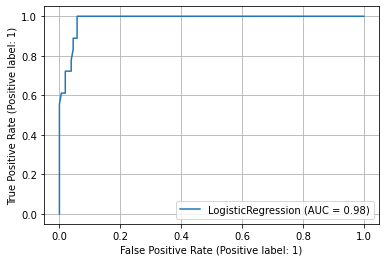

In [34]:
from sklearn.metrics import plot_roc_curve

# ROC curve 
plot_roc_curve(model, x_test, y_test)
plt.grid()